## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [16]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [17]:
df_new = df[["make_model", "hp_kW", "km","age", "price", "Gearing_Type","Gears"]] 

In [18]:
df_new

,make_model,hp_kW,km,age,price,Gearing_Type,Gears
0,Audi A1,66.0,56013.000000,3.0,15770,Automatic,7.0
1,Audi A1,141.0,80000.000000,2.0,14500,Automatic,7.0
2,Audi A1,85.0,83450.000000,3.0,14640,Automatic,7.0
3,Audi A1,66.0,73000.000000,3.0,14500,Automatic,6.0
4,Audi A1,66.0,16200.000000,3.0,16790,Automatic,7.0
...,...,...,...,...,...,...,...
15910,Renault Espace,147.0,1647.362609,0.0,39950,Automatic,6.0
15911,Renault Espace,165.0,9900.000000,0.0,39885,Automatic,7.0
15912,Renault Espace,146.0,15.000000,0.0,39875,Automatic,6.0
15913,Renault Espace,147.0,10.000000,0.0,39700,Automatic,6.0


In [19]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,price,Gearing_Type,Gears
2614,Audi A2,85.0,26166.0,1.0,28200,Manual,6.0


In [20]:
df_new.drop(index=[2614], inplace =True)

In [21]:
df_new = df_new[~(df_new.price>35000)]

In [12]:
df_new = pd.get_dummies(df_new)
df_new

,hp_kW,km,age,price,Gears,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.0,56013.0,3.0,15770,7.0,1,0,0,0,0,0,0,0,1,0,0
1,141.0,80000.0,2.0,14500,7.0,1,0,0,0,0,0,0,0,1,0,0
2,85.0,83450.0,3.0,14640,7.0,1,0,0,0,0,0,0,0,1,0,0
3,66.0,73000.0,3.0,14500,6.0,1,0,0,0,0,0,0,0,1,0,0
4,66.0,16200.0,3.0,16790,7.0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15787,118.0,10803.0,1.0,33990,6.0,0,0,0,0,0,0,0,1,1,0,0
15788,165.0,15.0,0.0,33975,7.0,0,0,0,0,0,0,0,1,1,0,0
15789,118.0,1.0,1.0,33990,6.0,0,0,0,0,0,0,0,1,1,0,0
15790,146.0,15.0,0.0,33975,6.0,0,0,0,0,0,0,0,1,1,0,0


## Train test split

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [24]:
cat = X.select_dtypes("object").columns
cat

Index(['make_model', 'Gearing_Type'], dtype='object')

In [25]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears
0,0.0,66.0,56013.0,3.0,0.0,7.0
1,0.0,141.0,80000.0,2.0,0.0,7.0
2,0.0,85.0,83450.0,3.0,0.0,7.0
3,0.0,66.0,73000.0,3.0,0.0,6.0
4,0.0,66.0,16200.0,3.0,0.0,7.0


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

## XG Boost Regressor

In [62]:
#!pip install --upgrade pip

In [63]:
#!pip install xgboost

In [30]:
from xgboost import XGBRegressor

In [31]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror") #objective="reg:squarederror"

# objective ="reg:linear değişti."

In [32]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [34]:
train_val(xgb_model, X_train, y_train, X_test, y_test)

NameError: name 'r2_score' is not defined

In [68]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.899077
test_neg_mean_absolute_error       -0.725835
test_neg_mean_squared_error        -2.904931
test_neg_root_mean_squared_error   -1.461227
dtype: float64

## Gridsearch for XGBoost

In [69]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [70]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [71]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=101),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [72]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 0.5}

In [73]:
grid_model.best_score_

-1.1771591438195685

In [74]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999791,0.973263
mae,0.054037,0.507799
mse,0.005328,0.717641
rmse,0.072994,0.847137


## Feature importance

In [75]:
model = XGBRegressor(random_state=101, objective="reg:squarederror", learning_rate=0.2, max_dept=6, subsample=0.5)
model.fit(X_train, y_train)

XGBRegressor(learning_rate=0.2, max_dept=6, objective='reg:squarederror',
             random_state=101, subsample=0.5)

In [76]:
model.feature_importances_

array([0.08059955, 0.6419647 , 0.03368963, 0.07816733, 0.00611593,
       0.00832384, 0.00128312, 0.14985596], dtype=float32)

In [77]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['xgb_Importance'])
xgb_imp_feats = imp_feats.sort_values('xgb_Importance')
xgb_imp_feats

,xgb_Importance
Owner,0.001283
Seller_Type,0.006116
Transmission,0.008324
Kms_Driven,0.033690
Fuel_Type,0.078167
Car_Name,0.080600
vehicle_age,0.149856
Present_Price,0.641965


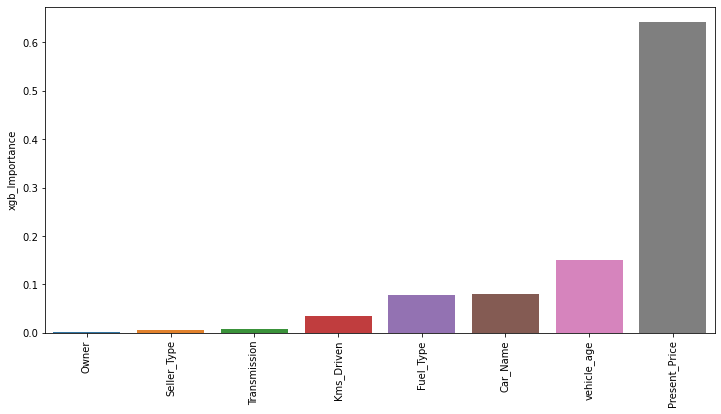

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_Importance')

plt.xticks(rotation=90);

## Feature importance comparison

In [79]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_Importance,grad_Importance,xgb_Importance
Seller_Type,0.001096,0.013530,0.006116
Owner,0.001210,0.000259,0.001283
Transmission,0.002697,0.020118,0.008324
Car_Name,0.014086,0.091294,0.080600
Fuel_Type,0.016936,0.052514,0.078167
Kms_Driven,0.032930,0.032139,0.033690
vehicle_age,0.097546,0.054395,0.149856
Present_Price,0.833498,0.735751,0.641965


## New model

In [80]:
X_new = df[["vehicle_age",  "Present_Price"]]

In [81]:
X_new.head()

,vehicle_age,Present_Price
0,7,5.59
1,8,9.54
2,4,9.85
3,10,4.15
4,7,6.87


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=5)

In [83]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [84]:
model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=101)

In [85]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.991681,0.948123
mae,0.307787,0.770614
mse,0.212689,1.311378
rmse,0.461183,1.145154


In [86]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.886573
test_neg_mean_absolute_error       -0.666894
test_neg_mean_squared_error        -2.357701
test_neg_root_mean_squared_error   -1.297375
dtype: float64

## Gridsearch for new XGBoost model

In [87]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [88]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [89]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=101),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [90]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [91]:
grid_model.best_score_

-1.193325439318438

In [92]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992991,0.960710
mae,0.284564,0.661908
mse,0.179196,0.993194
rmse,0.423315,0.996591


In [ ]:
gradient boosting + regülarizasyon+ hız +missig value handle =  xgboost